# <font color=green> 1. Introduction </font>

The aim is to build a multiple linear regression model for the prediction of demand for shared bikes.

It is required to model the demand for shared bikes with the available independent variables. It will be used to understand how exactly the demands vary with different features. The business strategy can be manipulated accordingly to meet the demand levels and meet the customer's expectations. Further, the model will be a good way to understand the demand dynamics of a new market. 

# <font color=green> 2. Importing the necessary libraries </font>

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [6]:
import datetime
from scipy.stats import pearsonr

# <font color=green> 3. Data: Importing, Cleaning & Understanding  </font>

Importing the Data File

In [7]:
#Read the Data in csv file format
data=pd.read_csv("day.csv")
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


Importing the Data Dictionary

In [8]:
#Open and Read the Data Dictionary in text file format
print(open('Readme.txt').read())

Dataset characteristics
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	
License

In [9]:
#Identifying the number of Rows and Columns present in Original Dataset
print('No. of Rows in the dataset =',data.shape[0])
print('No. of Columns in the dataset =',data.shape[1])

No. of Rows in the dataset = 730
No. of Columns in the dataset = 16


In [10]:
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [11]:
data.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
unique,NaN,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,24-02-2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,365.500000,NaN,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,NaN,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,NaN,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000


Checking duplicate row entries

In [12]:
print("Shape of Data Frame after removing duplicates (if any) is", data.drop_duplicates().shape)

Shape of Data Frame after removing duplicates (if any) is (730, 16)


<font color=red>
    
#### Observations from the Dataset:
    
- The orginal dataset contains 16 Columns and 760 Rows
- There are no duplicate rows
- No null value present in the dataset 
- There are 4 float,11 integer and 1 object datatypes
   
</font>

Data Preparation

Dropping the column 'instant' which provides record index, since it will not have effect on target variable

In [13]:
data1=data.drop(columns='instant')

In [14]:
print(data1)

         dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0    01-01-2018       1   0     1        0        6           0           2   
1    02-01-2018       1   0     1        0        0           0           2   
2    03-01-2018       1   0     1        0        1           1           1   
3    04-01-2018       1   0     1        0        2           1           1   
4    05-01-2018       1   0     1        0        3           1           1   
..          ...     ...  ..   ...      ...      ...         ...         ...   
725  27-12-2019       1   1    12        0        4           1           2   
726  28-12-2019       1   1    12        0        5           1           2   
727  29-12-2019       1   1    12        0        6           0           2   
728  30-12-2019       1   1    12        0        0           0           1   
729  31-12-2019       1   1    12        0        1           1           2   

          temp     atemp      hum  windspeed  casua

In [15]:
data1.shape

(730, 15)

Checking the validity of the date, month and year

In [16]:
data['dteday'].apply(lambda x: int(x.split('-')[0])).describe()

count    730.000000
mean      15.720548
std        8.802278
min        1.000000
25%        8.000000
50%       16.000000
75%       23.000000
max       31.000000
Name: dteday, dtype: float64

In [17]:
data['dteday'].apply(lambda x: int(x.split('-')[1])).describe()

count    730.000000
mean       6.526027
std        3.450215
min        1.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       12.000000
Name: dteday, dtype: float64

In [18]:
data['dteday'].apply(lambda x: int(x.split('-')[2])).describe()

count     730.000000
mean     2018.500000
std         0.500343
min      2018.000000
25%      2018.000000
50%      2018.500000
75%      2019.000000
max      2019.000000
Name: dteday, dtype: float64

<font color=red>
    
- The date values are valid and found to be in the range (1,31) which is a valid date value
- The month values are valid and found to be in the range (1,12)  which is a valid month value
- The year is between 2018 and 2019
    
</font>

From the dataset it is observed that there are coloumns separetly for Year and Month. Hence, in the date (dteday) column, the month and year can be removed.

In [19]:
data1['dteday'] = data1['dteday'].apply(lambda x: int(x.split('-')[0]))

Renaming the Columns

In [20]:
data1=data1.rename(columns={'dteday':'Date',
                            'season':'Season',
                            'yr':'Year',
                            'mnth':'Month',
                            'holiday':'Holiday',
                            'weekday':'Weekday',
                            'workingday':'Workingday',
                            'weathersit':'Weather_Situation',
                            'temp':'Temperature',
                            'atemp':'FeelingTemperature',
                            'hum':'Humidity',
                            'windspeed':'WindSpeed',
                            'casual':'CasualRides',
                            'registered':'RegisteredRides',
                            'cnt':'TotalRides'})

In [21]:
# Defining the map function to map numerical label into season and applying to the 'Season' column
def season_map(x):
        return x.map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})
    
data1[['Season']] = data1[['Season']].apply(season_map)

In [22]:
# Defining the map function to map numerical label into Month and applying to the 'Month' column
def month_map(x):
        return x.map({1: 'January', 2: 'February', 3: 'March', 4: 'April',
                      5: 'May', 6: 'June', 7: 'July', 8: 'August',
                      9: 'September', 10: 'October', 11: 'November', 12: 'December'})
    
data1[['Month']] = data1[['Month']].apply(month_map)

In [23]:
# Defining the map function to map numerical label into Weekdays and applying to the 'Weekday' column
def weekday_map(x):
        return x.map({0: 'Tuesday', 1: 'Wednesday', 2: 'Thursday', 3: 'Friday', 4: 'Saturday',
                      5: 'Sunday', 6: 'Monday'})
    
data1[['Weekday']] = data1[['Weekday']].apply(weekday_map)

In [24]:
# Defining the map function to map numerical label into Weather_Situation and applying to the 'Weather_Situation' column
def weather_map(x):
        return x.map({1: 'ClearSky', 2: 'Mist', 3:'LightRain', 4:'HeavyRain'})
    
data1[['Weather_Situation']] = data1[['Weather_Situation']].apply(weather_map)

In [25]:
data1.head()

,Date,Season,Year,Month,Holiday,Weekday,Workingday,Weather_Situation,Temperature,FeelingTemperature,Humidity,WindSpeed,CasualRides,RegisteredRides,TotalRides
0,1,Spring,0,January,0,Monday,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,Spring,0,January,0,Tuesday,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,Spring,0,January,0,Wednesday,1,ClearSky,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,Spring,0,January,0,Thursday,1,ClearSky,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,Spring,0,January,0,Friday,1,ClearSky,9.305237,11.46350,43.6957,12.522300,82,1518,1600


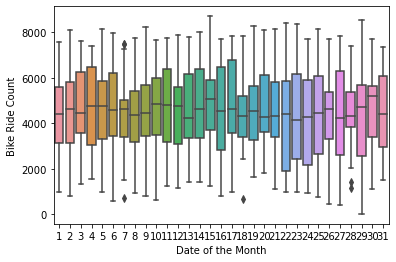

In [26]:
sns.boxplot(data = data1, x = 'Date', y = 'TotalRides')
plt.xlabel('Date of the Month')
plt.ylabel('Bike Ride Count')
plt.show()

<font color=brown>
    
<b> From the boxplot, it appears that the Date of the month doesn't have much impact on bike ride count </b>
    
</font>

In [27]:
# Dropping 'Date' since Date of the Month doesn't appear to have impact on bike ride count

data1.drop(['Date'], axis = 1, inplace = True)

## Checking the correlation between numerical variables

In [28]:
Num_Variables=data1[["Temperature", "FeelingTemperature", "Humidity", "WindSpeed", "CasualRides", "RegisteredRides", "TotalRides"]]
Num_Variables

,Temperature,FeelingTemperature,Humidity,WindSpeed,CasualRides,RegisteredRides,TotalRides
0,14.110847,18.18125,80.5833,10.749882,331,654,985
1,14.902598,17.68695,69.6087,16.652113,131,670,801
2,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...
725,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,10.489153,11.58500,48.3333,23.500518,364,1432,1796


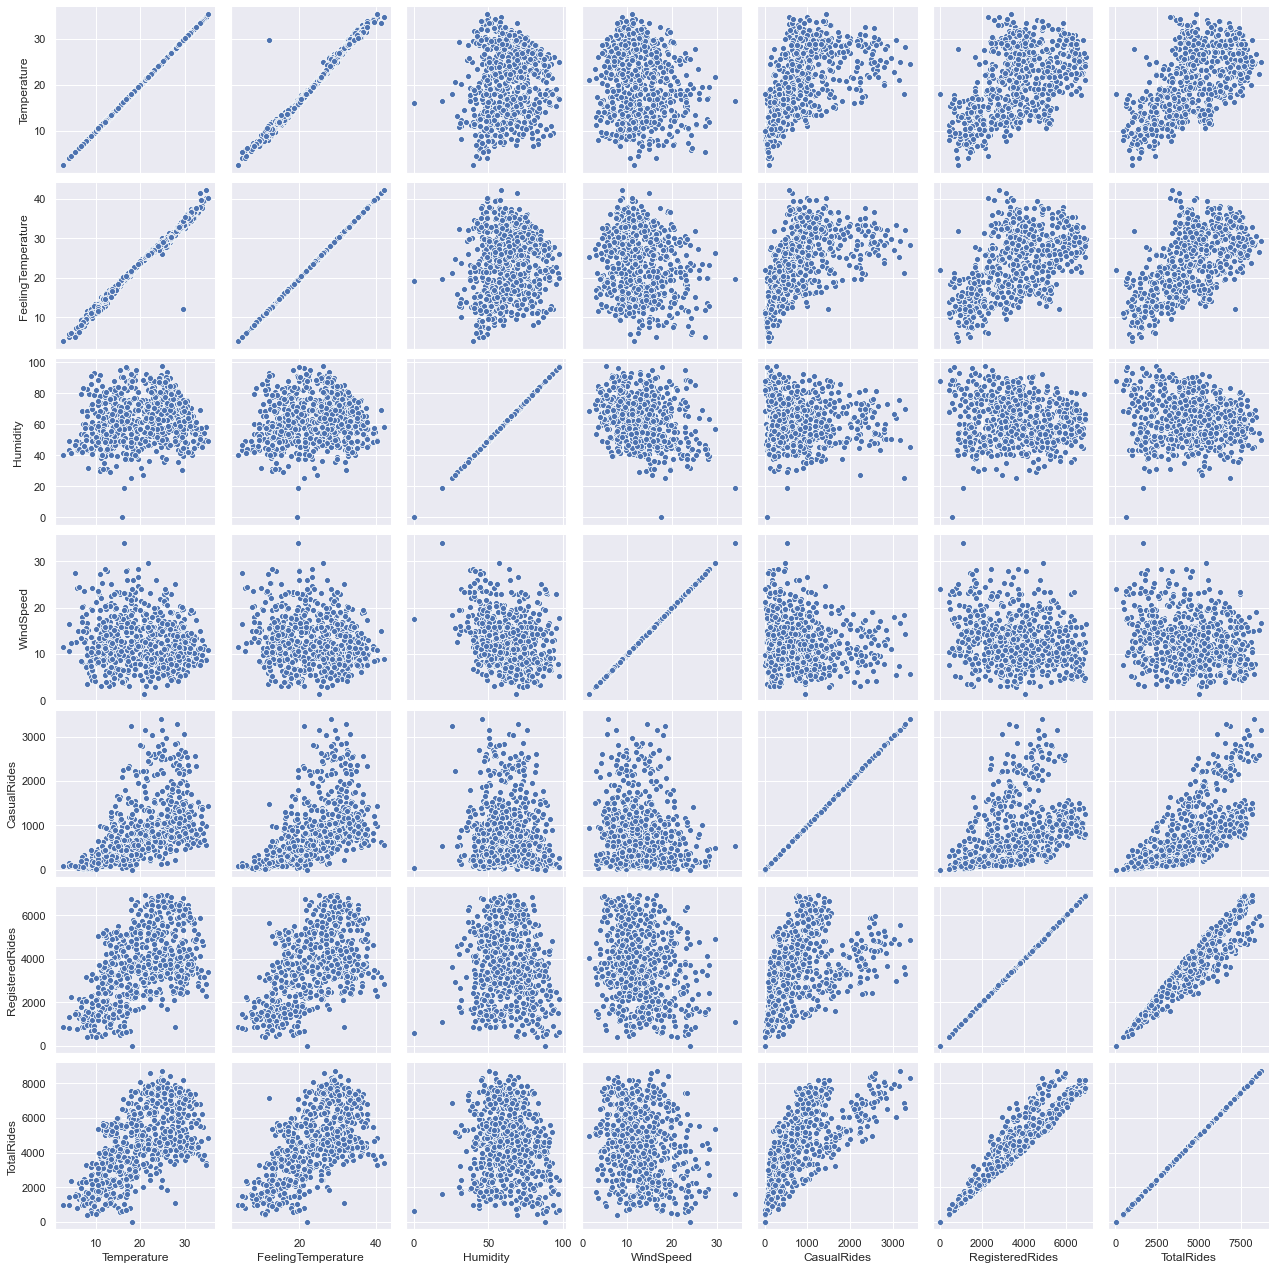

In [29]:
sns.set(rc = {'figure.figsize':(30,16)})
g = sns.PairGrid(Num_Variables)
g.map(sns.scatterplot)

Text(0.5, 1.0, "Pearson's Correlation Matrix")

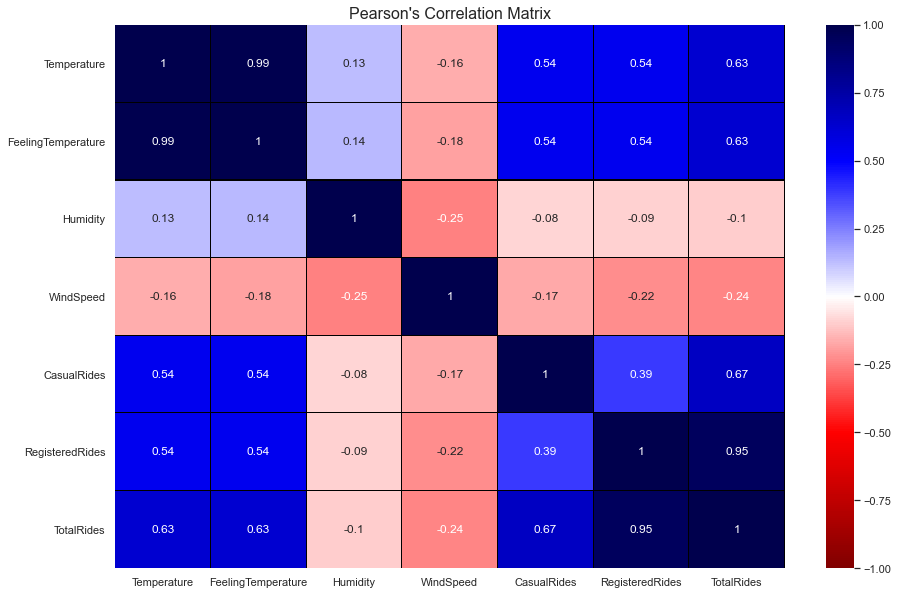

In [30]:
sns.set()
fig, PCM = plt.subplots(figsize=(15,10))
PCM = sns.heatmap(Num_Variables.corr().round(2), vmin=-1, vmax=1, center=0, cmap="seismic_r", annot=True, linewidths=0.1, linecolor='black')
PCM.set_title("Pearson's Correlation Matrix", fontsize=16, fontdict={})

From the Pearson Correlation Matrix, it is found that the Temperature and Feeling Temperature have strong positive correlation. Hence the 'FeelingTemperature' column can be dropped.

In [31]:
# Dropping 'FeelingTemperature' column

data1.drop(['FeelingTemperature'], axis = 1, inplace = True)

In [32]:
# Dropping 'CasualRides' & 'RegisteredRides' columns since the sum of these is the 'TotalRides' column which is the target variable

data1.drop(['CasualRides', 'RegisteredRides'], axis = 1, inplace = True)

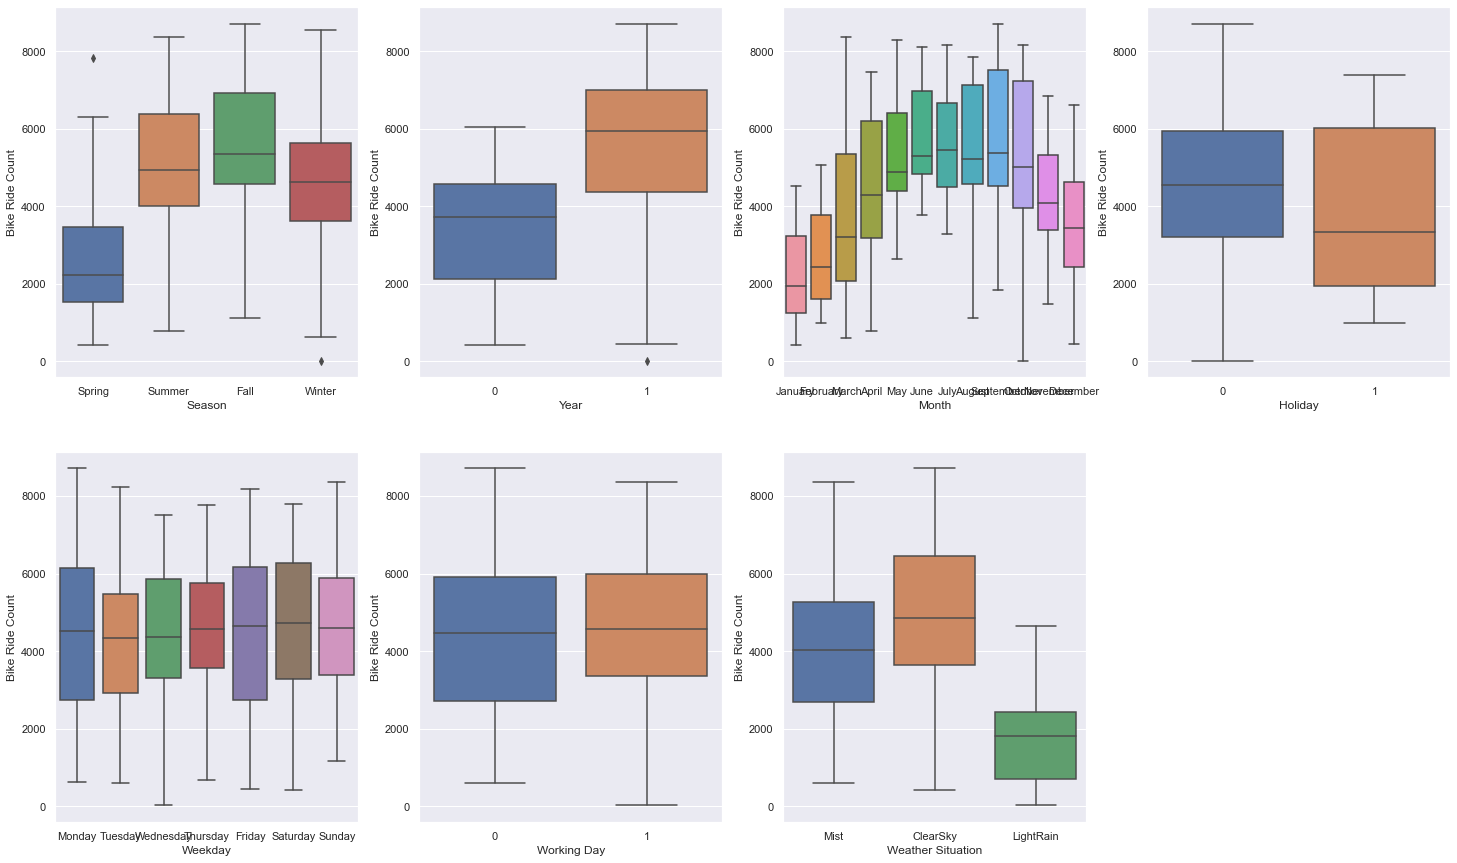

In [33]:
plt.figure(figsize=(25, 15))
plt.subplot(2,4,1)
sns.boxplot(x = 'Season', y = 'TotalRides', data = data1)
plt.xlabel('Season')
plt.ylabel('Bike Ride Count')
plt.subplot(2,4,2)
sns.boxplot(x = 'Year', y = 'TotalRides', data = data1)
plt.xlabel('Year')
plt.ylabel('Bike Ride Count')
plt.subplot(2,4,3)
sns.boxplot(x = 'Month', y = 'TotalRides', data = data1)
plt.xlabel('Month')
plt.ylabel('Bike Ride Count')
plt.subplot(2,4,4)
sns.boxplot(x = 'Holiday', y = 'TotalRides', data = data1)
plt.xlabel('Holiday')
plt.ylabel('Bike Ride Count')
plt.subplot(2,4,5)
sns.boxplot(x = 'Weekday', y = 'TotalRides', data = data1)
plt.xlabel('Weekday')
plt.ylabel('Bike Ride Count')
plt.subplot(2,4,6)
sns.boxplot(x = 'Workingday', y = 'TotalRides', data = data1)
plt.xlabel('Working Day')
plt.ylabel('Bike Ride Count')
plt.subplot(2,4,7)
sns.boxplot(x = 'Weather_Situation', y = 'TotalRides', data = data1)
plt.xlabel('Weather Situation')
plt.ylabel('Bike Ride Count')
plt.show()

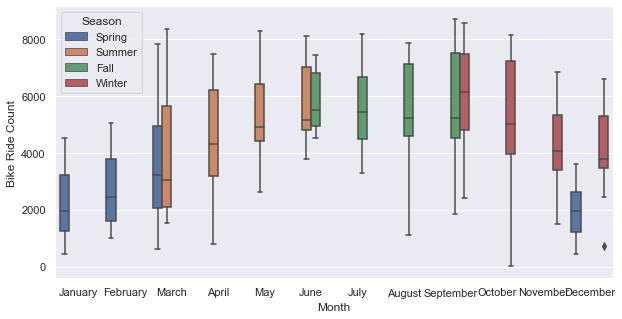

In [34]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'Month', y = 'TotalRides', hue = 'Season', data = data1)
plt.xlabel('Month')
plt.ylabel('Bike Ride Count')
plt.show()

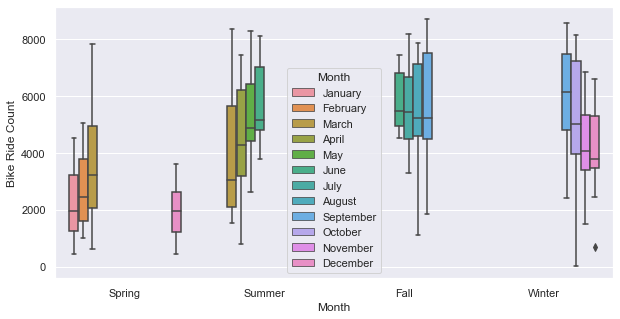

In [35]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'Season', y = 'TotalRides', hue = 'Month', data = data1)
plt.xlabel('Month')
plt.ylabel('Bike Ride Count')
plt.show()

<font color=brown>
Observations from Grouped Box Plots with Month & Season
    
- The bike ride count is relatively high during Summer and Fall seasons from March to September
- The Month variable can be grouped and mapped to Season as follows,
    December to March: Spring
    March to June : Summer
    June to September: Fall
    September to December: Winter
- This shows that Month and Season variables are related.
</font>

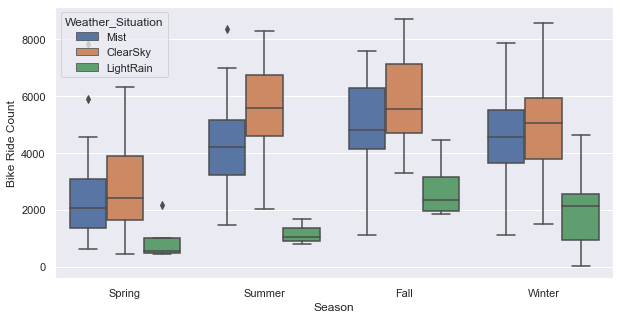

In [36]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'Season', y = 'TotalRides', hue = 'Weather_Situation', data = data1)
plt.xlabel('Season')
plt.ylabel('Bike Ride Count')
plt.show()

<font color=brown>
<b> The bike ride count is relatively high during Summer and Fall seasons without rain, snow and thunderstrom conditions. </b>
</font>

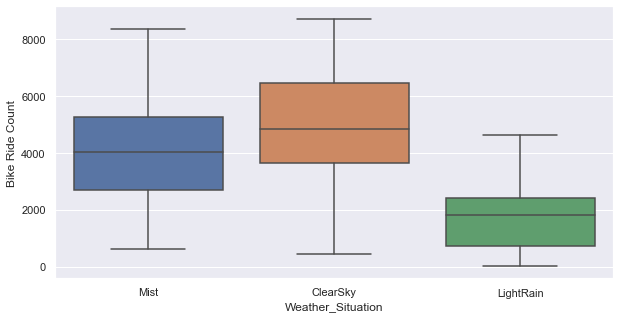

In [37]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'Weather_Situation', y = 'TotalRides', data = data1)
plt.xlabel('Weather_Situation')
plt.ylabel('Bike Ride Count')
plt.show()

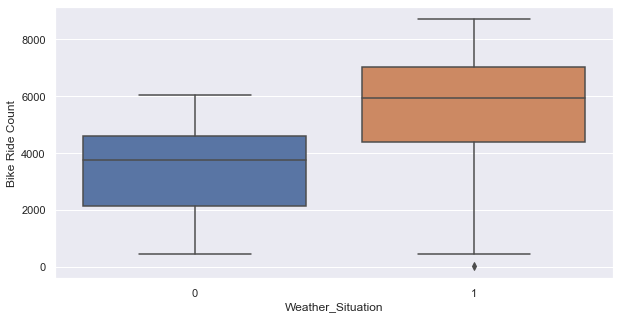

In [38]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'Year', y = 'TotalRides', data = data1)
plt.xlabel('Weather_Situation')
plt.ylabel('Bike Ride Count')
plt.show()

Creation of Dummy Variables for 'Season' column

The variable `Season` has 4 levels and it appears to have impact of bike ride count. Hence it is converted into dummy variables.

In [39]:
# Get the dummy variables for the feature 'Season' and store it in a new variable - 'S'
S = pd.get_dummies(data1['Season'])

In [40]:
# Dropping the first column from dataframe 'S' using 'drop_first = True'

S = pd.get_dummies(data1['Season'], drop_first = True)

In [41]:
# Adding the results to the dataframe 'data1'

data1 = pd.concat([data1, S], axis = 1)

In [42]:
# Dropping 'Season' since dummy variables are created for it

data1.drop(['Season'], axis = 1, inplace = True)

In [43]:
data1.head()

,Year,Month,Holiday,Weekday,Workingday,Weather_Situation,Temperature,Humidity,WindSpeed,TotalRides,Spring,Summer,Winter
0,0,January,0,Monday,0,Mist,14.110847,80.5833,10.749882,985,1,0,0
1,0,January,0,Tuesday,0,Mist,14.902598,69.6087,16.652113,801,1,0,0
2,0,January,0,Wednesday,1,ClearSky,8.050924,43.7273,16.636703,1349,1,0,0
3,0,January,0,Thursday,1,ClearSky,8.200000,59.0435,10.739832,1562,1,0,0
4,0,January,0,Friday,1,ClearSky,9.305237,43.6957,12.522300,1600,1,0,0


Creation of Dummy Variables for 'Weekday' column

Before creating the dummy variables for 'Weekday', let's plot the Bike Ride Count vs Weekdays

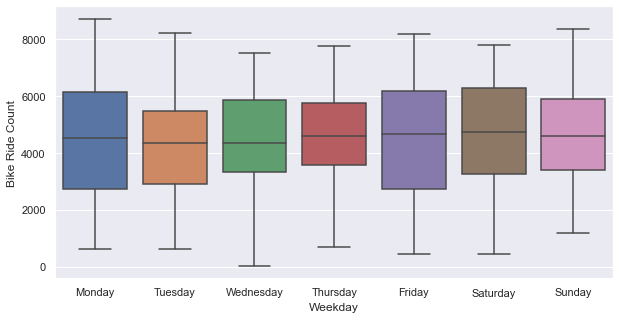

In [44]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'Weekday', y = 'TotalRides', data = data1)
plt.xlabel('Weekday')
plt.ylabel('Bike Ride Count')
plt.show()

It looks like that the day of the week don't have much impact on the Bike Ride Count

In [45]:
WD =  pd.get_dummies(data1['Weekday'] , drop_first = True) 

In [46]:
data1 = pd.concat([data1, WD], axis = 1)

In [47]:
# Dropping 'Weakday' since dummy variables are created for it

data1.drop(['Weekday'], axis = 1, inplace = True)

In [48]:
data1.head()

,Year,Month,Holiday,Workingday,Weather_Situation,Temperature,Humidity,WindSpeed,TotalRides,Spring,Summer,Winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,January,0,0,Mist,14.110847,80.5833,10.749882,985,1,0,0,1,0,0,0,0,0
1,0,January,0,0,Mist,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0
2,0,January,0,1,ClearSky,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,1
3,0,January,0,1,ClearSky,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0
4,0,January,0,1,ClearSky,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0


Creation of Dummy Variables for 'Weather_Situation' column

In [49]:
Weather=pd.get_dummies(data1['Weather_Situation'] , drop_first = True) 

In [50]:
data1 = pd.concat([data1, Weather], axis = 1)

In [51]:
data1.drop(['Weather_Situation'], axis = 1, inplace = True)

In [52]:
data1.head()

,Year,Month,Holiday,Workingday,Temperature,Humidity,WindSpeed,TotalRides,Spring,Summer,Winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,LightRain,Mist
0,0,January,0,0,14.110847,80.5833,10.749882,985,1,0,0,1,0,0,0,0,0,0,1
1,0,January,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,1
2,0,January,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,1,0,0
3,0,January,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0
4,0,January,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0,0,0


Creation of Dummy Variables for 'Month' column

In [53]:
M=pd.get_dummies(data1['Month'] , drop_first = True) 

In [54]:
data1 = pd.concat([data1, M], axis = 1)

In [55]:
data1.drop(['Month'], axis = 1, inplace = True)

In [56]:
data1.head()

,Year,Holiday,Workingday,Temperature,Humidity,WindSpeed,TotalRides,Spring,Summer,Winter,...,December,February,January,July,June,March,May,November,October,September
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


# <font color=green> 4. Splitting the Data into Training and Testing Sets </font>

In [57]:
np.random.seed(0)
df_train, df_test = train_test_split(data1, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

In [58]:
scaler = MinMaxScaler()

In [59]:
# Apply scaler() to all the columns except the 'dummy' variables
Num_Variables1=['Temperature','Humidity', 'WindSpeed', 'TotalRides']

df_train[Num_Variables1] = scaler.fit_transform(df_train[Num_Variables1])

<ipython-input-59-1c1fbe67559a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[Num_Variables1] = scaler.fit_transform(df_train[Num_Variables1])
C:\Users\Santhosh\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [60]:
df_train.head()

,Year,Holiday,Workingday,Temperature,Humidity,WindSpeed,TotalRides,Spring,Summer,Winter,...,December,February,January,July,June,March,May,November,October,September
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Dividing into X and Y sets for the model building

In [61]:
y_train = df_train.pop('TotalRides')
X_train = df_train

# <font color=green> 5. Building a linear model </font>

In [62]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_sm).fit()

lr_1.params

const          0.242930
Year           0.232116
Holiday        0.006726
Workingday     0.093651
Temperature    0.450562
Humidity      -0.151340
WindSpeed     -0.186453
Spring        -0.048159
Summer         0.038725
Winter         0.105847
Monday         0.098544
Saturday      -0.003849
Sunday         0.005388
Thursday      -0.013502
Tuesday        0.044008
Wednesday     -0.015519
LightRain     -0.257443
Mist          -0.061066
August         0.014404
December      -0.045586
February      -0.032282
January       -0.062777
July          -0.040350
June          -0.002972
March          0.001045
May            0.023940
November      -0.041851
October        0.007534
September      0.081060
dtype: float64

In [63]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalRides   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 19 Apr 2023   Prob (F-statistic):          8.74e-182
Time:                        23:10:51   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2429      0.035      6.854      

In [64]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Workingday,86.81
9,Monday,19.72
13,Tuesday,18.35
6,Spring,10.79
8,Winter,9.50
7,Summer,8.29
3,Temperature,7.12
25,November,6.80
26,October,6.59
17,August,6.43


### Dropping the variable and updating the model

In [66]:
X = X_train_sm.drop(['January', 'February', 'March','May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], axis=1)

In [67]:
# Build 2nd fitted model
X_train_sm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_sm).fit()

# Print the summary of the 8th model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalRides   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     154.9
Date:                Wed, 19 Apr 2023   Prob (F-statistic):          1.76e-180
Time:                        23:10:52   Log-Likelihood:                 496.55
No. Observations:                 510   AIC:                            -959.1
Df Residuals:                     493   BIC:                            -887.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2104      0.029      7.235      

In [68]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\Santhosh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Santhosh\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
2,Holiday,inf
3,Workingday,inf
14,Tuesday,inf
10,Monday,inf
7,Spring,4.55
4,Temperature,3.51
9,Winter,3.11
8,Summer,2.07
5,Humidity,1.89
15,Wednesday,1.76


In [69]:
X = X_train_sm.drop(['Holiday', 'Saturday', 'Sunday'], axis=1)

In [70]:
# Build 3rd fitted model
X_train_sm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_sm).fit()

# Print the summary of the 3rd model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalRides   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.6
Date:                Wed, 19 Apr 2023   Prob (F-statistic):          1.12e-182
Time:                        23:10:52   Log-Likelihood:                 496.42
No. Observations:                 510   AIC:                            -962.8
Df Residuals:                     495   BIC:                            -899.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2109      0.044      4.750      

In [71]:
X = X_train_sm.drop(['Thursday', 'Tuesday', 'Wednesday'], axis=1)

In [72]:
# Build 4th fitted model
X_train_sm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_sm).fit()

# Print the summary of the 4th model
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalRides   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.5
Date:                Wed, 19 Apr 2023   Prob (F-statistic):          5.24e-185
Time:                        23:10:53   Log-Likelihood:                 493.64
No. Observations:                 510   AIC:                            -963.3
Df Residuals:                     498   BIC:                            -912.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2369      0.037      6.466      

In [73]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,79.13
6,Spring,4.54
3,Temperature,3.50
8,Winter,3.10
7,Summer,2.06
4,Humidity,1.88
2,Workingday,1.65
9,Monday,1.64
11,Mist,1.57
10,LightRain,1.25


# <font color=green> 6. Residual Analysis of the train data </font>

In [74]:
y_train_TotalRides = lr_4.predict(X_train_sm)

Text(0.5, 0, 'Errors')

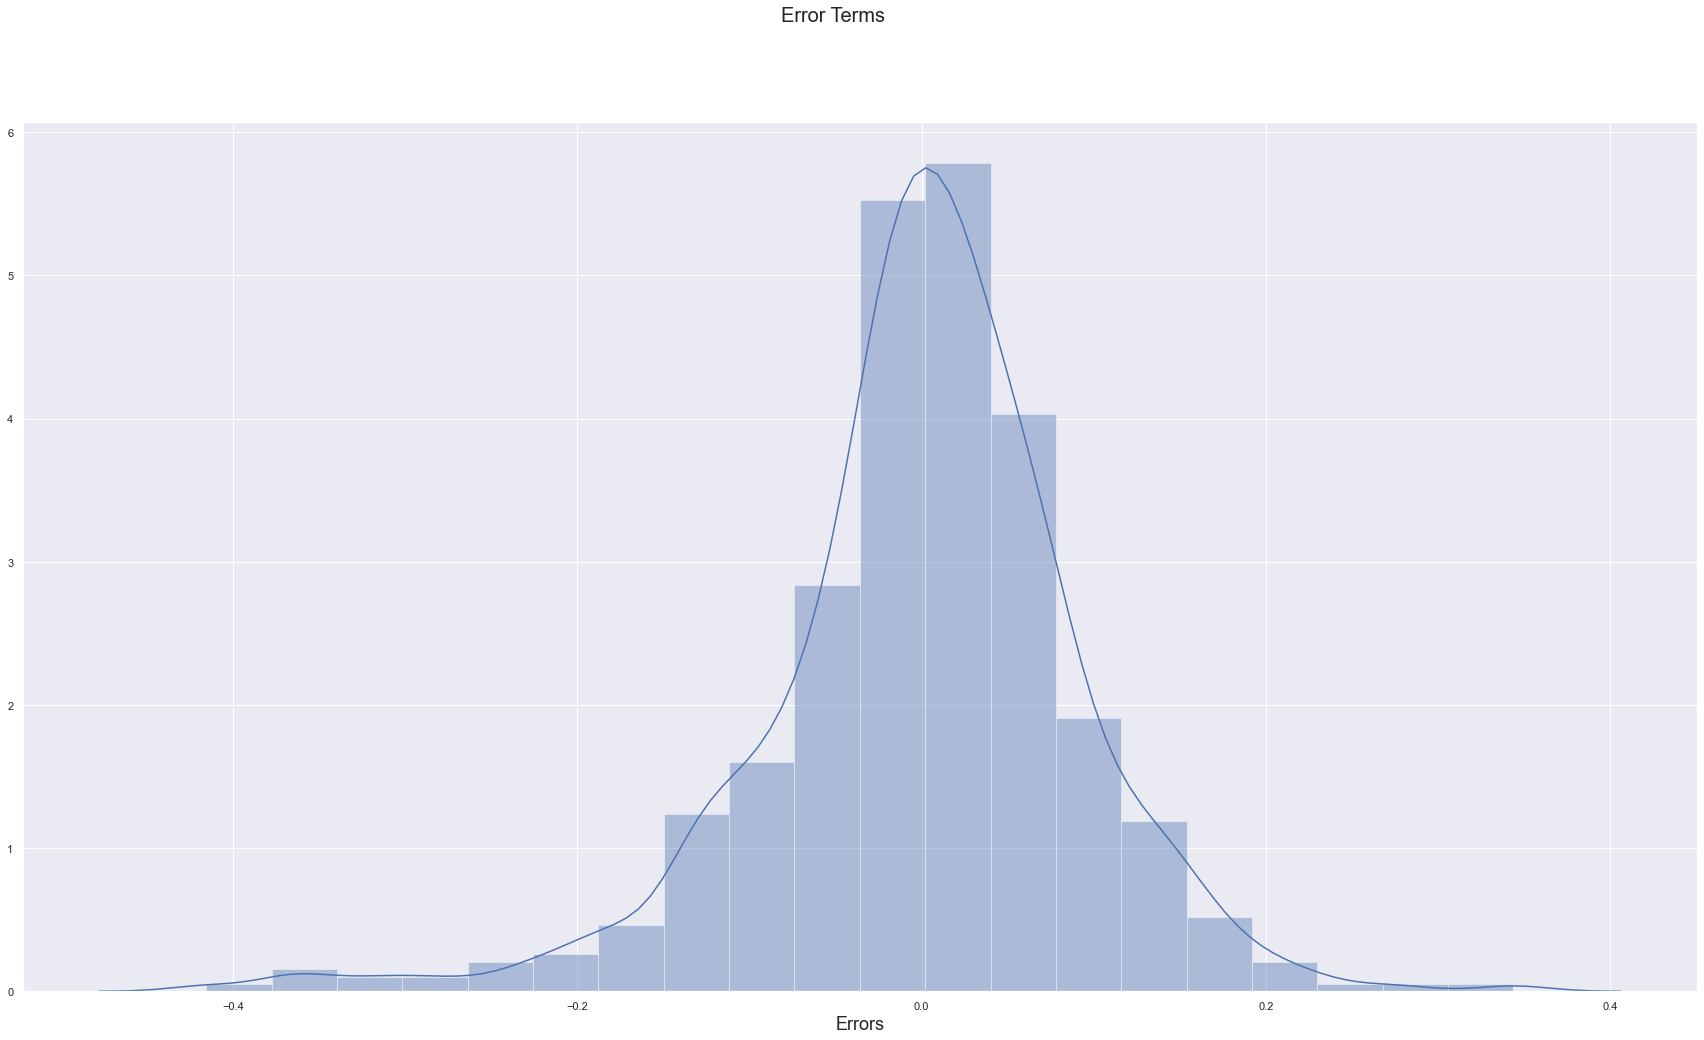

In [75]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_TotalRides), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [76]:
#Checking the mean of the residuals
residuals = y_train - y_train_TotalRides
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -1.9026174971027191e-16


# <font color=green> 7. Making Predictions Using the Final Model </font>

#### Applying the scaling on the test sets

In [77]:
Num_Variables1=['Temperature','Humidity', 'WindSpeed', 'TotalRides']

df_test[Num_Variables1] = scaler.transform(df_test[Num_Variables1])

<ipython-input-77-4ba98f146872>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[Num_Variables1] = scaler.transform(df_test[Num_Variables1])
C:\Users\Santhosh\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [78]:
df_test.describe()

,Year,Holiday,Workingday,Temperature,Humidity,WindSpeed,TotalRides,Spring,Summer,Winter,...,December,February,January,July,June,March,May,November,October,September
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [79]:
y_test = df_test.pop('TotalRides')
X_test = df_test

In [80]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [81]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(['January', 'February', 'March','May', 'June',
                            'July', 'August', 'September', 'October', 'November', 'December',
                            'Holiday', 'Saturday', 'Sunday',
                            'Thursday', 'Tuesday', 'Wednesday'], axis = 1)

In [82]:
X_test_m4

,const,Year,Workingday,Temperature,Humidity,WindSpeed,Spring,Summer,Winter,Monday,LightRain,Mist
184,1.0,0,0,0.831783,0.657364,0.084219,0,0,0,0,0,1
535,1.0,1,1,0.901354,0.610133,0.153728,0,1,0,0,0,0
299,1.0,0,1,0.511964,0.837699,0.334206,0,0,1,0,0,1
221,1.0,0,1,0.881625,0.437098,0.339570,0,0,0,0,0,0
152,1.0,0,1,0.817246,0.314298,0.537414,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
400,1.0,1,0,0.257562,0.708888,0.287411,1,0,0,0,0,1
702,1.0,1,1,0.519232,0.756118,0.283397,0,0,1,0,0,0
127,1.0,0,0,0.584649,0.650923,0.069510,0,1,0,0,0,0
640,1.0,1,1,0.745598,0.817947,0.052115,0,0,1,0,0,1


In [83]:
# Making predictions using the fourth model

y_pred_m4 = lr_4.predict(X_test_m4)

# <font color=green> 8. Model Evaluation </font>

Text(0, 0.5, 'y_pred')

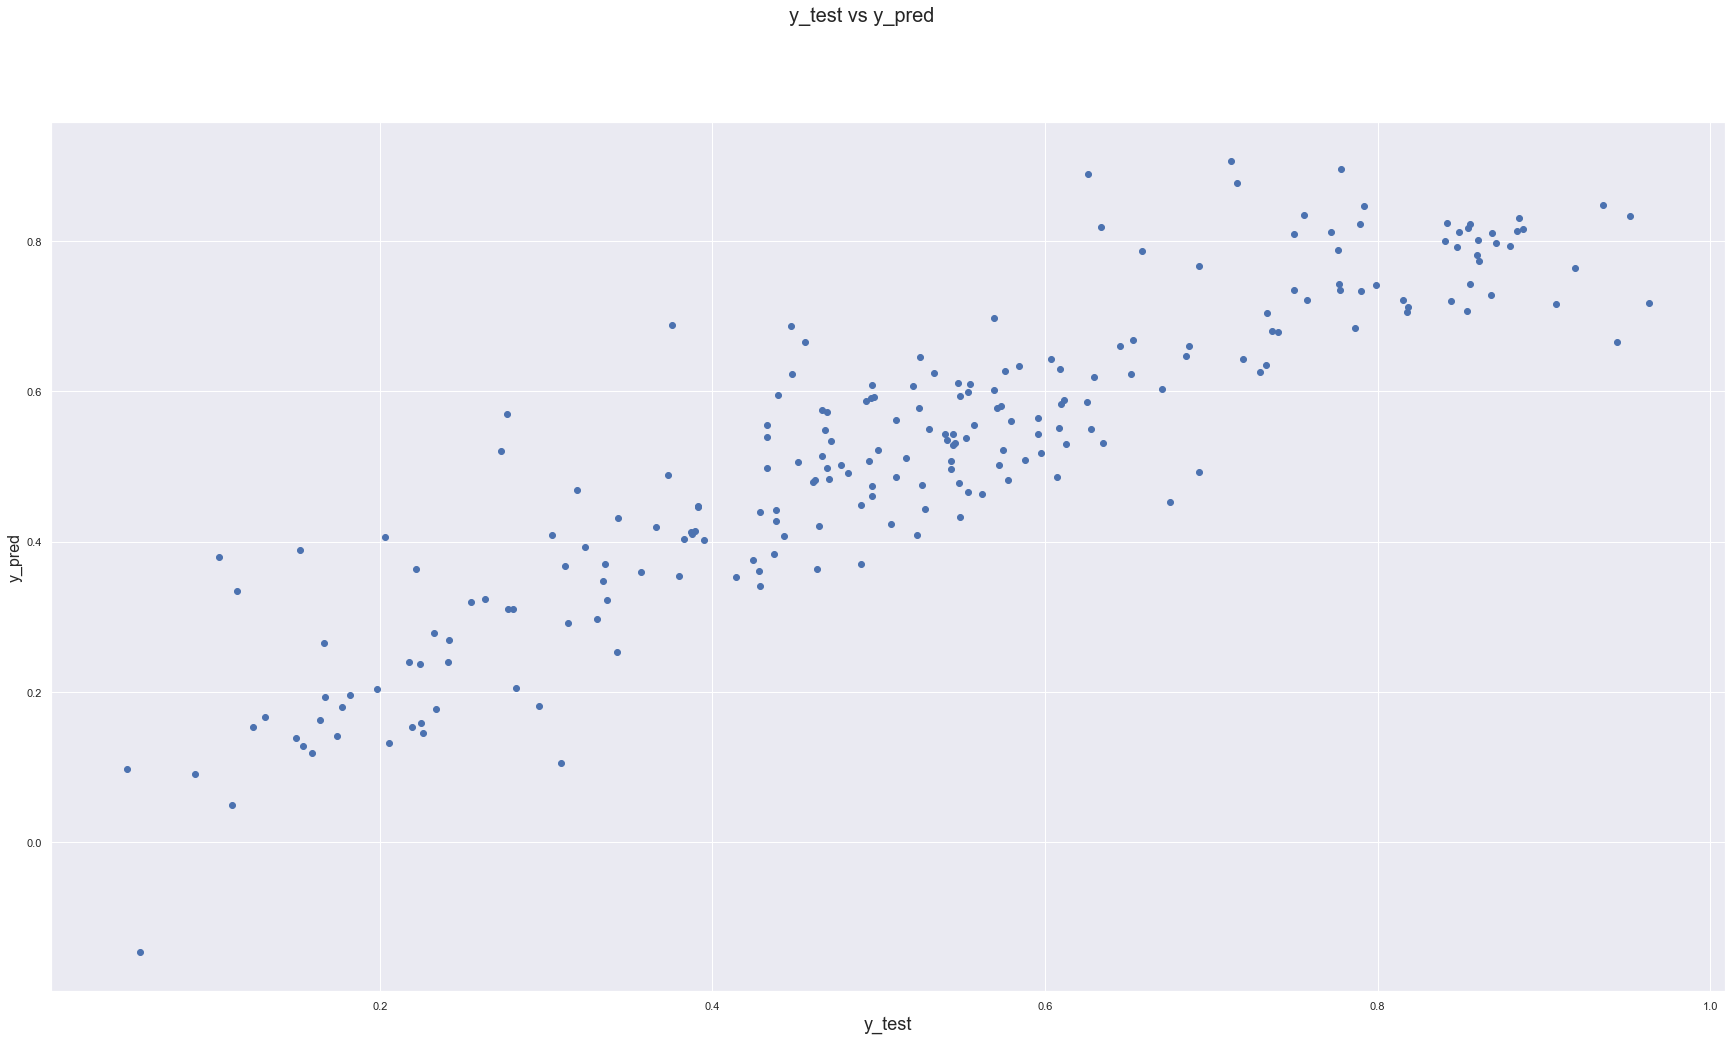

In [84]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)


The equation of our best fitted line is:

$ TotalRides = (0.496  \times  Temperature) + (0.231  \times  Year) - (0.249 \times WeatherSituation3) -( 0.182 \times WindSpeed) -( 0.127 \times Humidity) + (0.089 \times Winter) + (0.063 \times Monday) + (0.054 \times Workingday) + (0.043 \times Summer) - (0.074 \times Spring)- (0.058 \times WeatherSituation2) +0.237 $

where,

Total Rides - Total no. of Rental Bikes Rides,

Temperature - Temperature in Celsius

Year - 2018, if Year = 0 (or) 2019, if Year = 1

WeatherSituation3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

WindSpeed - Speed of the wind

Winter - Winter Season, if Winter = 1
